![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [2]:
def pres_val(Ct,r,t):
    """
    Calculate the present value of a cash flow.

    Parameters:
        Ct (float): Cash flow at time t.
        r (float): Interest rate.
        t (int): Time period.

    Returns:
        float: Present value of the cash flow.
    """
    return Ct / ((1+r)**t)

Ct=100
r=0.03
t=10

print(f"The present value of cash flow for Ct= {Ct} with interest rate r= {r} amounts to {pres_val(Ct,r,t):,.2f}")


The present value of cash flow for Ct= 100 with interest rate r= 0.03 amounts to 74.41


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

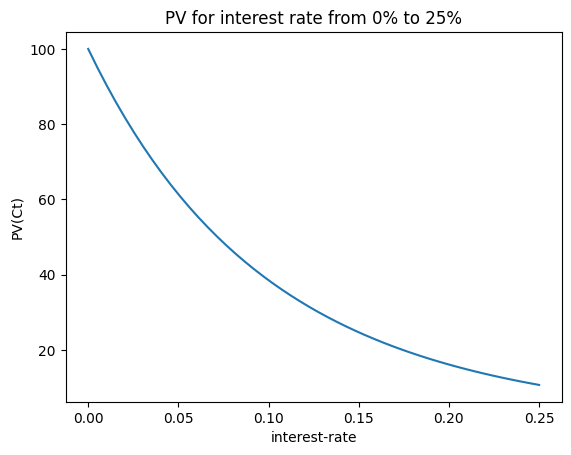

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Ct=100
t=10
r_vals=np.linspace(0, 0.25)

pv_vals=[pres_val(Ct, r, t) for r in r_vals]
plt.plot(r_vals, pv_vals)
plt.ylabel('PV(Ct)')
plt.xlabel('interest-rate')
plt.title('PV for interest rate from 0% to 25%')
plt.show()

### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [4]:
#Values
ct=[10,10,110]

#Empty list to store output
cv=[]

#Interest rate
r=0.05

#Amount of years
years=3


print(f"The discounted Cash flow with flat interest rate {r} amounts to:\n")

for t in range(years):

    cv.append(pres_val(ct[t],r,t+1))
    
    print(f"Year {t+1}: C{t+1}= {ct[t]}\n value is {cv[t]:,.2f}$\n")

print(f"The total amount is {sum(cv):,.2f}$")

The discounted Cash flow with flat interest rate 0.05 amounts to:

Year 1: C1= 10
 value is 9.52$

Year 2: C2= 10
 value is 9.07$

Year 3: C3= 110
 value is 95.02$

The total amount is 113.62$


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

In [5]:
import pandas as pd
import numpy as np

prices=pd.DataFrame(pd.read_csv('02_python_data.csv',index_col=0))
returns = pd.DataFrame({a: [(prices.loc[prices.index[i], a] - prices.loc[prices.index[i-1], a]) / prices.loc[prices.index[i-1], a] for i in range(1, len(prices))] for a in prices.columns})
logreturns = pd.DataFrame({b: [np.log(prices.loc[prices.index[i], b] / prices.loc[prices.index[i-1], b]) for i in range(1, len(prices))] for b in prices.columns})

print("Prices:")
display(prices.head())
print("\nAlgorithmic returns:")
display(returns.head())
print("\nLogarithmic returns:")
display(logreturns.head())

Prices:


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,14097.88,97.026932,117.78,17.570,105.50,216.20,67.10,148.94,78.51,51.26,...,66.02,55.26,193.65,6.282,214.8,73.94,37.83,44.04,79.54,41.29
2022-05-02,13939.07,95.982669,115.12,17.290,103.96,215.00,62.22,147.22,77.64,50.22,...,62.46,54.74,187.90,6.204,211.6,72.30,37.74,44.01,77.48,41.41
2022-05-03,14039.47,94.729554,114.56,17.376,106.44,217.00,62.88,150.20,79.98,50.42,...,64.32,55.22,197.10,6.412,222.4,72.18,38.07,44.06,79.58,39.40
2022-05-04,13970.82,92.979171,115.78,17.530,102.68,213.55,62.33,148.52,79.47,51.98,...,63.30,55.42,192.30,6.310,213.1,72.48,37.15,43.34,78.32,40.20
2022-05-05,13902.52,94.699718,116.58,17.592,108.96,199.76,61.00,147.18,78.03,53.06,...,60.54,54.18,189.95,6.188,211.0,71.34,33.21,44.05,77.78,38.75



Algorithmic returns:


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,-0.011265,-0.010763,-0.022584,-0.015936,-0.014597,-0.005550,-0.072727,-0.011548,-0.011081,-0.020289,...,-0.053923,-0.009410,-0.029693,-0.012416,-0.014898,-0.022180,-0.002379,-0.000681,-0.025899,0.002906
1,0.007203,-0.013056,-0.004864,0.004974,0.023855,0.009302,0.010608,0.020242,0.030139,0.003982,...,0.029779,0.008769,0.048962,0.033527,0.051040,-0.001660,0.008744,0.001136,0.027104,-0.048539
2,-0.004890,-0.018478,0.010649,0.008863,-0.035325,-0.015899,-0.008747,-0.011185,-0.006377,0.030940,...,-0.015858,0.003622,-0.024353,-0.015908,-0.041817,0.004156,-0.024166,-0.016341,-0.015833,0.020305
3,-0.004889,0.018505,0.006910,0.003537,0.061161,-0.064575,-0.021338,-0.009022,-0.018120,0.020777,...,-0.043602,-0.022375,-0.012220,-0.019334,-0.009855,-0.015728,-0.106057,0.016382,-0.006895,-0.036070
4,-0.016416,-0.037597,-0.016641,-0.016485,-0.014868,-0.020324,0.017705,-0.008969,0.013200,-0.038447,...,0.012884,-0.005906,-0.006054,-0.010989,-0.015166,-0.032520,0.006323,-0.017253,-0.011057,-0.008516



Logarithmic returns:


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,-0.011329,-0.010821,-0.022843,-0.016065,-0.014705,-0.005566,-0.075508,-0.011615,-0.011143,-0.020497,...,-0.055431,-0.009455,-0.030142,-0.012494,-0.015010,-0.022430,-0.002382,-0.000681,-0.026240,0.002902
1,0.007177,-0.013142,-0.004876,0.004962,0.023575,0.009259,0.010552,0.020040,0.029694,0.003975,...,0.029344,0.008731,0.047801,0.032977,0.049780,-0.001661,0.008706,0.001135,0.026743,-0.049757
2,-0.004902,-0.018651,0.010593,0.008824,-0.035964,-0.016026,-0.008785,-0.011248,-0.006397,0.030471,...,-0.015985,0.003615,-0.024655,-0.016036,-0.042716,0.004148,-0.024463,-0.016476,-0.015960,0.020101
3,-0.004901,0.018336,0.006886,0.003531,0.059363,-0.066754,-0.021569,-0.009063,-0.018286,0.020564,...,-0.044581,-0.022629,-0.012296,-0.019524,-0.009903,-0.015853,-0.112113,0.016249,-0.006919,-0.036736
4,-0.016553,-0.038322,-0.016781,-0.016622,-0.014979,-0.020534,0.017550,-0.009009,0.013114,-0.039206,...,0.012802,-0.005924,-0.006073,-0.011050,-0.015282,-0.033061,0.006303,-0.017404,-0.011118,-0.008553


### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

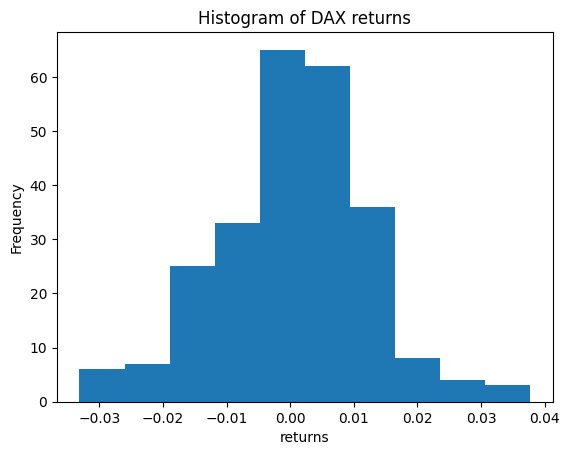

In [6]:
#Task 1 Plot a histogram of DAX returns.
import matplotlib.pyplot as plt

plt.hist(returns[".GDAXI"])
plt.xlabel('returns')
plt.ylabel('Frequency')
plt.title('Histogram of DAX returns')
plt.savefig('02_python_DAX_returns_histogram.png')

In [7]:
# Task 2: Plot prices and returns of DAX in one plot with two y-axes




### Task:

Which company had the highest average stock return during the time period covered by the data?

In [8]:
max_avg_ret_comp=returns.mean().idxmax()
max_avg_ret=returns.mean().max()

print(f"The company with the highest average stock return during the time period is {max_avg_ret_comp} with an average return of {max_avg_ret*100:,.5f}% ")

The company with the highest average stock return during the time period is CBKG.DE with an average return of 0.24368% 


### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

Minimum correlation: -0.8377 between PSHG_p.DE and MUVGn.DE
Maximum correlation: 0.9655 between IFXGn.DE and SIEGn.DE


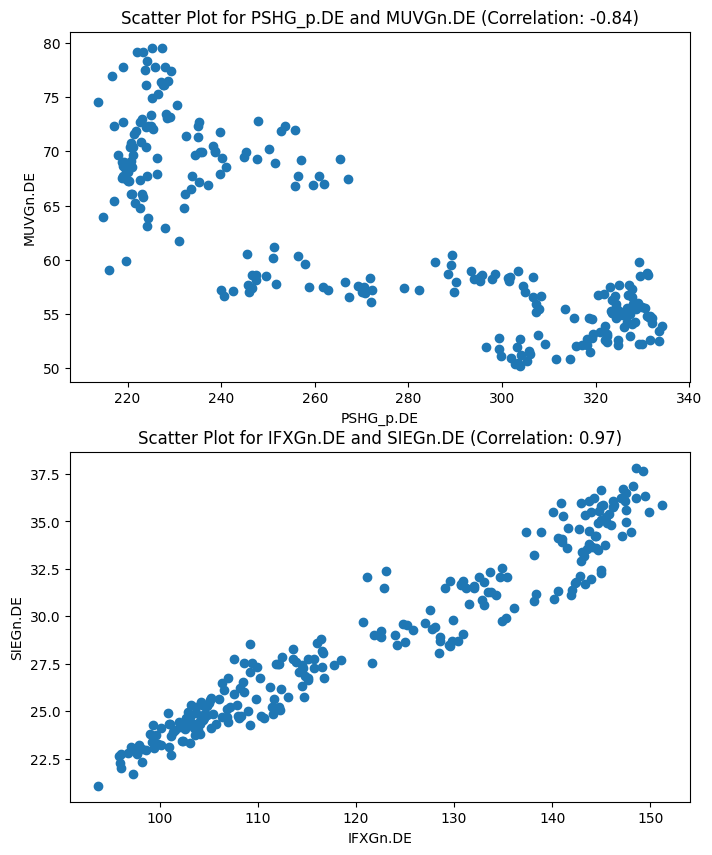

In [118]:
corr_matrix=pd.DataFrame(prices.corr())
min=1
min_pos=[]
max=0
max_pos=[]

for i in range(len(corr_matrix)):
    for j in range(i+1,len(corr_matrix)):
        if corr_matrix.iloc[i,j]<=min:
            min=corr_matrix.iloc[i,j]
            min_pos=[i,j]
        if corr_matrix.iloc[i,j]>=max:
            max=corr_matrix.iloc[i,j]
            max_pos=[i,j]


print(f"Minimum correlation: {min:,.4f} between {corr_matrix.columns[min_pos[1]]} and {corr_matrix.columns[min_pos[0]]}")
print(f"Maximum correlation: {max:,.4f} between {corr_matrix.columns[max_pos[1]]} and {corr_matrix.columns[max_pos[0]]}")

plt.figure(figsize=(8, 10))

plt.subplot(2,1,1)
plt.title(f'Scatter Plot for {corr_matrix.columns[min_pos[1]]} and {corr_matrix.columns[min_pos[0]]} (Correlation: {min:.2f})')
plt.xlabel(corr_matrix.columns[min_pos[1]])
plt.ylabel(corr_matrix.columns[min_pos[0]])
plt.scatter(prices[corr_matrix.columns[min_pos[0]]],prices[corr_matrix.columns[min_pos[1]]])


plt.subplot(2,1,2)
plt.title(f'Scatter Plot for {corr_matrix.columns[max_pos[1]]} and {corr_matrix.columns[max_pos[0]]} (Correlation: {max:.2f})')
plt.xlabel(corr_matrix.columns[max_pos[1]])
plt.ylabel(corr_matrix.columns[max_pos[0]])
plt.scatter(prices[corr_matrix.columns[max_pos[0]]],prices[corr_matrix.columns[max_pos[1]]])



### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html